In [46]:
import json # we need to use the JSON package to load the data, since the data is stored in JSON format
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

In [47]:
stopwords = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

In [48]:
with open("proj1_data.json") as fp:
    data = json.load(fp)

In [49]:
# Lowers every word's text, and split
for data_point in data:
    data_point["text"] = data_point["text"].lower().split()

In [50]:
is_admin = np.zeros((12000,1))
i = 0
for data_point in data:
    if "I am a rob" in data_point['text']:
        is_admin[i] = 1
    if "[deleted]" in data_point['text']:
        is_admin[i] = 1
    if "[removed]" in data_point['text']:
        is_admin[i] = 1
    i += 1
is_admin

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [51]:
# Sets Traning, Validation, Test sets
training_set = data[:10000]
validation_set = data[10000:11000]
test_set = data[11000:]

In [52]:
# Finds words recurring number
words_recurrence = {}
for data_point in training_set:
    for word in data_point["text"]:
        if word in words_recurrence:
            words_recurrence[word] += 1
        else:
            words_recurrence[word] = 1

In [53]:
idf = {}
for data_point in training_set:
    flag = {}
    for word in data_point['text']:
        if word in idf:
            if word not in flag:
                idf[word] += 1
                flag[word] = 1
        else:
            idf[word] = 1
            flag[word] = 1

In [54]:
# Sorts from high to low amd trim to size 160 
words_recurrence = sorted(words_recurrence.items(), key=lambda kv: kv[1], reverse=True)
del words_recurrence[60:]

In [55]:
# The 160 most frequently occurring words (from 0 to 159)
# Builds vector w
w = {}
i = 0
for word in words_recurrence:
    w[word[0]] = i
    i += 1

In [56]:
# Builds matrix x
x = np.zeros((12000, 60))
i = 0
for data_point in data:
    for word in data_point["text"]:
        if word in w:
            x[i, w[word]] += math.log10(12000 / idf[word])
    i += 1

In [57]:
# Splits x into Traning, Validation, Test vectors
x_training = x[:10000]
x_validation = x[10000:11000]
x_test = x[11000:]

In [58]:
# Builds vector y
y = np.zeros(12000)
i = 0
for data_point in data:
    y[i] = data_point["popularity_score"]
    i += 1

In [59]:
# Splits y into Traning, Validation, Test vectors
y_training = y[:10000]
y_validation = y[10000:11000]
y_test = y[11000:]

In [60]:
def add_bias(x_dataset):
    x_dataset_bias = np.ones((x_dataset.shape[0], x_dataset.shape[1]+1))
    x_dataset_bias[:,:-1] = x_dataset
    return x_dataset_bias

In [61]:
# Closed-form solution

In [62]:
weights_closed = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(add_bias(x_training)), add_bias(x_training))), np.transpose(add_bias(x_training))), y_training)
estimation_closed = np.dot(add_bias(x_validation), weights_closed)

In [63]:
# Mean-square error
def ms_err(predict, true):
    return (np.square(predict - true).mean(axis=None))
print(ms_err(estimation_closed, y_validation))

1.265296363816706


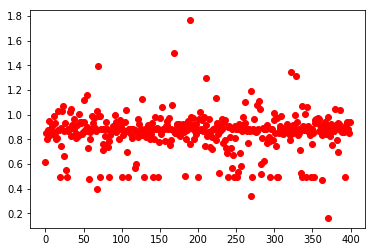

In [64]:
estimation_closed = estimation_closed[400:800]
plt.plot(estimation_closed, 'ro')
plt.show()

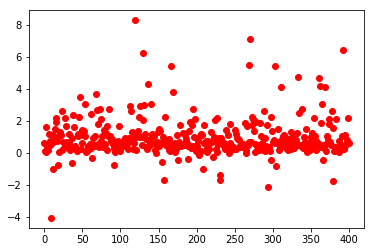

In [65]:
y_validation = y_validation[400:800]
plt.plot( y_validation, 'ro')
plt.show()

In [66]:
# Gradient descent

In [67]:
def gradient_descent(x, y, beta, n0, eps):
    i = 1
    weight = np.random.rand(x.shape[1])
    a1 = np.transpose(x) @ x
    a2 = np.transpose(x) @ y
    while True:
        alpha = n0/((1+beta*i) * 10000)
        weight_new = weight - 2*alpha * (a1@weight - a2)
        difference = np.linalg.norm(weight_new - weight, ord=2)
        weight = weight_new
        i += 1           
        #plt.plot(i, difference, 'ro')
        #if(i % 1000 == 0):
         #   print("Iteration: " + str(i) + ". Difference: " + str(difference))
        if (difference < eps):
            print(difference)
            break
    return weight

In [68]:
weights_gradient = gradient_descent(add_bias(x_training), y_training, beta=10e-3, n0=10e-3, eps= 1 * 10e-07)

9.999893614876123e-07


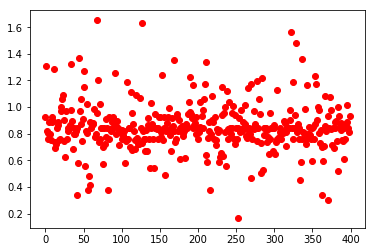

1.4198490235042374


In [69]:
estimation_gradient = np.dot(add_bias(x_validation), weights_gradient)
estimation_gradient = estimation_gradient[400:800]
plt.plot(estimation_gradient, 'ro')
plt.show()
print(ms_err(estimation_gradient, y_validation))

In [70]:
# Feature, number of words in string

In [113]:
# Builds matrix x_feature
x_feature_length = np.zeros((12000, 60))
i = 0
for data_point in data:
    for word in data_point["text"]:
        if word in w:
            x_feature_length[i, w[word]] += 1
    i += 1
np.shape(x_feature_length)
x_feature_length.shape[1]
print(x_feature_length)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [108]:
# Finds words count
word_counts = np.zeros(12000)
i = 0
for data_point in training_set:
    word_counts[i] = len(data_point["text"])
    i += 1
word_counts

array([3., 5., 5., ..., 0., 0., 0.])

In [109]:
x_feature_length = np.append(x_feature_length, is_admin, axis=1)

x_feature_length.shape

(12000, 61)

In [110]:
# Splits x into Traning, Validation, Test vectors
x_training = x_feature_length[:10000]
x_validation = x_feature_length[10000:11000]
x_test = x_feature_length[11000:]
y_validation = y[10000:11000]

In [111]:
y_training

array([1.25469816, 0.50981271, 0.3708268 , ..., 0.15810991, 0.89307136,
       0.14033016])

In [112]:
weights_closed = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(add_bias(x_training)), add_bias(x_training))), np.transpose(add_bias(x_training))), y_training)
estimation_closed = np.dot(add_bias(x_validation), weights_closed)
print(ms_err(estimation_closed, y_validation))

1.2627887560526891
